In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests
import csv
import re
import lxml
import matplotlib.pyplot as plt
import wordninja
import itertools
import nltk
flatten = itertools.chain.from_iterable
pd.set_option('mode.chained_assignment', None)

In [2]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

### Scrape products from Etsy

In [52]:
#scrape paracord bracelet in 'Woven & Braided Bracelets' category
#no ads
#scrape on Oct 29,2020
bracelet_urls = []
for i in range(0,20):
    page = requests.get('https://www.etsy.com/ca/search/jewelry/bracelets/woven-and-braided-bracelets?ga_order=most_relevant&ga_search_type=all&ga_view_type=gallery&ga_search_query=paracord+bracelet&plkey=2bc137b2b1a3a80ed8dd69910aaa78e90c685767%3A636978552&pro=1&explicit=1&q=paracord+bracelet&ref=pagination&page='+str(i))
    soup = BeautifulSoup(page.content, 'html.parser')
    for a in soup.find_all('a', href=True): 
        find_link = re.findall(r"^https://www.etsy.com/ca/listing/[0-9]+/.+$",a['href'])
        if find_link != []:
            bracelet_urls.append(find_link)

In [53]:
len(bracelet_urls)

944

In [54]:
np.savetxt('bracelet_urls.txt',bracelet_urls, newline = "\n", fmt = '%s')

In [55]:
urls_list = open("bracelet_urls.txt").read().splitlines()

In [56]:
urls_list[0:5]

['https://www.etsy.com/ca/listing/802855610/zero-paracord-menwomen-fashion-bracelet?ga_order=most_relevant&ga_search_type=all&ga_view_type=gallery&ga_search_query=paracord+bracelet&ref=sr_gallery-1-1&organic_search_click=1',
 'https://www.etsy.com/ca/listing/564288213/black-paracord-survival-bracelet-w?ga_order=most_relevant&ga_search_type=all&ga_view_type=gallery&ga_search_query=paracord+bracelet&ref=sr_gallery-1-2&organic_search_click=1&frs=1&col=1',
 'https://www.etsy.com/ca/listing/863216754/wide-cuffed-paracord-bracelet?ga_order=most_relevant&ga_search_type=all&ga_view_type=gallery&ga_search_query=paracord+bracelet&ref=sr_gallery-1-3&organic_search_click=1&frs=1&col=1',
 'https://www.etsy.com/ca/listing/826605774/stylish-paracord-bracelet?ga_order=most_relevant&ga_search_type=all&ga_view_type=gallery&ga_search_query=paracord+bracelet&ref=sr_gallery-1-4&organic_search_click=1&col=1',
 'https://www.etsy.com/ca/listing/793491307/paracord-7-bracelets?ga_order=most_relevant&ga_search_t

In [58]:
len(urls_list)

944

In [46]:
#origin
def bracelet_information(bracelet_urls):
    header = []
    price_cad = []
    sales = []
    seller = []
    details = []
    description = []
    available = []
    no_reviews = []
    reviews = []
    ready_to_dispatch = []
    delivery_cost = []
    return_exchange = []

    for link in bracelet_urls:
        page = requests.get(link[0])
        soup = BeautifulSoup(page.content, 'html.parser')
    
        #header
        header_info = soup.find("h1").text.strip()
        header.append(header_info)
        
        #price
        price_cad_info = soup.find("p",{"class":'wt-text-title-03 wt-mr-xs-2'}).text
        price_cad_info = float(re.search('[0-9]+\.[0-9]+',price_cad_info.strip()).group())
        price_cad.append(price_cad_info)
    
        #sales
        sales_info = soup.find("a",{'class':'wt-text-link-no-underline wt-display-inline-flex-xs wt-align-items-center'})
        sales_info = [float(sales_info.text.replace('\n','').replace(",","").split()[0]) if sales_info is not None else 0]
        sales.append(sales_info)
        
        #seller
        seller_info = soup.find("p",{'class':'wt-text-body-01 wt-mr-xs-1'}).text.strip()
        seller.append(seller_info)
        
        #details
        details_info = soup.find("ul",{'class':'wt-text-body-01'})
        details_info = [details_info.text.strip().split("\n\n\n") if details_info is not None else 'No info']
        details.append(details_info)
        
        #description
        description_info = soup.find("p",{'class':'wt-text-body-01 wt-break-word'}).text.replace('_','').replace('✽','').strip()
        description.append(description_info)
        
        #availability
        available_info = soup.find("p",{'class': 'wt-text-caption wt-text-right-xs wt-no-wrap wt-ml-xs-1 wt-text-brick'})
        if available_info is None:
            available_info = soup.find("p",{'class':'wt-text-caption wt-text-right-xs wt-no-wrap wt-ml-xs-1'})
        available.append(available_info.text)
        
        #number of reviews
        no_reviews_info = soup.find("h3",{'class':'wt-text-body-03'})
        no_reviews_info = [re.search('^[0-9]+',no_reviews_info.text).group() if no_reviews_info is not None else 'No review']
        no_reviews.append(no_reviews_info)
        
        #customer reviews
        reviews_info = soup.find_all("p",{'class':'wt-text-truncate--multi-line wt-break-word'})
        reviews_info = [i.text.strip() for i in reviews_info]
        reviews.append(reviews_info)
        
        #ready to dispatch
        ready_to_dispatch_info = soup.find("p",{'class':'wt-text-body-03 wt-mt-xs-1 wt-line-height-tight'}).text.replace(' business days','')
        ready_to_dispatch.append(ready_to_dispatch_info)
        
        #ready to dispatch, delivery cost, return or exchange
        try:
            info = soup.find("p",{'class':'wt-text-body-03 wt-mt-xs-1 wt-line-height-tight'}).text
            ready_to_dispatch_info = info[0]
            delivery_cost_info = info[1]
            return_exchange_info = info[2]
        
        except:
            return_exchange_info = 'No info'
            
        ready_to_dispatch.append(ready_to_dispatch_info)
        delivery_cost.append(delivery_cost_info)
        return_exchange.append(return_exchange_info)
        
    return header,price_cad,sales,seller,details,description,available,no_reviews,reviews,ready_to_dispatch,delivery_cost,return_exchange

In [46]:
#draft
def bracelet_information(bracelet_urls):
    header = []
    price_cad = []
    sales = []
    seller = []
    details = []
    description = []
    available = []
    no_reviews = []
    reviews = []
    ready_to_dispatch = []
    delivery_cost = []
    return_exchange = []

    for link in bracelet_urls:
        page = requests.get(link[0])
        soup = BeautifulSoup(page.content, 'html.parser')
    
        #header
        try:
            header_info = soup.find("h1").text.strip()
            header.append(header_info)
        except:
            print(link)
        
        #price
        price_cad_info = soup.find("p",{"class":'wt-text-title-03 wt-mr-xs-2'}).text
        price_cad_info = float(re.search('[0-9]+\.[0-9]+',price_cad_info.strip()).group())
        price_cad.append(price_cad_info)
    
        #sales
        sales_info = soup.find("a",{'class':'wt-text-link-no-underline wt-display-inline-flex-xs wt-align-items-center'})
        sales_info = [float(sales_info.text.replace('\n','').replace(",","").split()[0]) if sales_info is not None else 0]
        sales.append(sales_info)
        
        #seller
        seller_info = soup.find("p",{'class':'wt-text-body-01 wt-mr-xs-1'}).text.strip()
        seller.append(seller_info)
        
        #details
        details_info = soup.find("ul",{'class':'wt-text-body-01'})
        details_info = [details_info.text.strip().split("\n\n\n") if details_info is not None else 'No info']
        details.append(details_info)
        
        #description
        description_info = soup.find("p",{'class':'wt-text-body-01 wt-break-word'}).text.replace('_','').replace('✽','').strip()
        description.append(description_info)
        
        #availability
        available_info = soup.find("p",{'class': 'wt-text-caption wt-text-right-xs wt-no-wrap wt-ml-xs-1 wt-text-brick'})
        if available_info is None:
            available_info = soup.find("p",{'class':'wt-text-caption wt-text-right-xs wt-no-wrap wt-ml-xs-1'})
        available.append(available_info.text)
        
        #number of reviews
        no_reviews_info = soup.find("h3",{'class':'wt-text-body-03'})
        no_reviews_info = [re.search('^[0-9]+',no_reviews_info.text).group() if no_reviews_info is not None else 'No review']
        no_reviews.append(no_reviews_info)
        
        #customer reviews
        reviews_info = soup.find_all("p",{'class':'wt-text-truncate--multi-line wt-break-word'})
        reviews_info = [i.text.strip() for i in reviews_info]
        reviews.append(reviews_info)
        
        #ready to dispatch
        ready_to_dispatch_info = soup.find("p",{'class':'wt-text-body-03 wt-mt-xs-1 wt-line-height-tight'}).text.replace(' business days','')
        ready_to_dispatch.append(ready_to_dispatch_info)
        
        #ready to dispatch, delivery cost, return or exchange
        try:
            info = soup.find("p",{'class':'wt-text-body-03 wt-mt-xs-1 wt-line-height-tight'}).text
            ready_to_dispatch_info = info[0]
            delivery_cost_info = info[1]
            return_exchange_info = info[2]
        
        except:
            return_exchange_info = 'No info'
            
        ready_to_dispatch.append(ready_to_dispatch_info)
        delivery_cost.append(delivery_cost_info)
        return_exchange.append(return_exchange_info)
        
    return header,price_cad,sales,seller,details,description,available,no_reviews,reviews,ready_to_dispatch,delivery_cost,return_exchange

### 1. Get header

In [32]:
def get_header(url):
    requests_session = requests.Session()
    page = requests_session.get(url)
    soup = BeautifulSoup(page.text, 'lxml')
    header = soup.find("h1").text.strip()
    return header

In [59]:
header = list(map(get_header,urls_list))

In [60]:
len(header)

944

In [67]:
np.savetxt('header.txt',header, newline = "\n", fmt = '%s',encoding='utf-8')

In [69]:
header = open("header.txt",encoding='utf-8').read().splitlines()

### 2. Get price

In [71]:
def get_price(url):
    requests_session = requests.Session()
    page = requests_session.get(url)
    soup = BeautifulSoup(page.text, 'lxml')
    price_cad = soup.find("p",{"class":'wt-text-title-03 wt-mr-xs-2'}).text
    price_cad = float(re.search('[0-9]+\.[0-9]+',price_cad.strip()).group())
    return price_cad

In [72]:
price = list(map(get_price,urls_list))

In [73]:
len(price)

944

### 3. Get sales

In [77]:
def get_sales(url):
    requests_session = requests.Session()
    page = requests_session.get(url)
    soup = BeautifulSoup(page.text, 'lxml')
    sales = soup.find("a",{'class':'wt-text-link-no-underline wt-display-inline-flex-xs wt-align-items-center'})
    sales = [float(sales.text.replace('\n','').replace(",","").split()[0]) if sales is not None else 0]
    return sales

In [78]:
sales = list(map(get_sales,urls_list))

In [79]:
len(sales)

944

In [86]:
sales = [i[0] for i in sales]

In [93]:
sales[:50]

[121.0,
 169.0,
 1.0,
 29.0,
 179.0,
 29.0,
 719.0,
 6897.0,
 2728.0,
 1236.0,
 2137.0,
 2.0,
 2137.0,
 1981.0,
 719.0,
 1549.0,
 3590.0,
 514.0,
 106.0,
 2728.0,
 719.0,
 2137.0,
 1236.0,
 313.0,
 3590.0,
 2137.0,
 2728.0,
 1223.0,
 169.0,
 13.0,
 2287.0,
 198.0,
 48.0,
 980.0,
 2287.0,
 198.0,
 1220.0,
 2728.0,
 2.0,
 175.0,
 1236.0,
 1236.0,
 179.0,
 63.0,
 5151.0,
 1762.0,
 440.0,
 71.0,
 121.0,
 169.0]

### 4. Get seller

In [97]:
def get_sellers(url):
    requests_session = requests.Session()
    page = requests_session.get(url)
    soup = BeautifulSoup(page.text, 'lxml')
    return soup.find("p",{'class':'wt-text-body-01 wt-mr-xs-1'}).text.strip()

In [98]:
sellers = list(map(get_sellers,urls_list))

In [99]:
len(sellers)

944

In [100]:
sellers[:50]

['blacksquirrel2019',
 'SterlingSurvival',
 'GorillaCordzCanada',
 'BraceletsandbeyondCa',
 'BrigsSandP',
 'BraceletsandbeyondCa',
 'Paracordprojectsuk',
 'ArtEngravingStudio',
 'NightWeaverCreations',
 'ALEXPEDITION',
 'SimpleParadise',
 'TonyDIY',
 'SimpleParadise',
 'VikingJewelryPlace',
 'Paracordprojectsuk',
 'StuffByColleenCanada',
 'KennlyDesign',
 'Cordbraid',
 'LadyLiJewellery',
 'NightWeaverCreations',
 'Paracordprojectsuk',
 'SimpleParadise',
 'ALEXPEDITION',
 'TheParacordSociety',
 'KennlyDesign',
 'SimpleParadise',
 'NightWeaverCreations',
 'RockNShore',
 'SterlingSurvival',
 'TheParacordCrow',
 'mikadojewels',
 'BijouxBohemesBloom',
 'CreativeTwines',
 'UKForcesGifts',
 'mikadojewels',
 'BijouxBohemesBloom',
 'FlashfireSupply',
 'NightWeaverCreations',
 'DragonClawStore',
 'GoKanji',
 'ALEXPEDITION',
 'ALEXPEDITION',
 'BrigsSandP',
 'ArbutusCoast',
 'BeadUpStudio',
 'CharlyBeeDesigns',
 'OneTrueNorthDesigns',
 'Extatics',
 'blacksquirrel2019',
 'SterlingSurvival']

### 5. Get details

In [89]:
def get_details(url):
    requests_session = requests.Session()
    page = requests_session.get(url)
    soup = BeautifulSoup(page.text, 'lxml')
    details = soup.find("ul",{'class':'wt-text-body-01'})
    details = [details.text.strip().split("\n\n\n") if details is not None else 'No info']
    return details

In [90]:
details = list(map(get_details,urls_list))

In [95]:
details = [i[0] for i in details]

In [91]:
len(details)

944

In [96]:
details[:50]

[['Handmade item', 'Materials: Nylon', 'Adjustable: Yes', 'Made to Order'],
 ['Handmade item',
  'Materials: Plastic',
  'Adjustable: No',
  'Closure: Buckle\n\nBracelet width: 7/8 Inches'],
 ['Handmade item',
  'Materials: Paracord',
  'Adjustable: No',
  'Closure: Buckle',
  'Made to Order'],
 ['Handmade item', 'Materials: Nylon', 'Adjustable: No', 'Closure: Buckle'],
 ['Handmade item',
  'Materials: Paracord',
  'Adjustable: No',
  'Closure: Buckle',
  'Can be personalised: Yes\n\nBracelet length: 7 Inches'],
 ['Handmade item', 'Materials: Nylon', 'Adjustable: No'],
 'No info',
 ['Handmade item\n\nBracelet width: 4 Millimetres\n\nMaterials: Polyester, Stainless steel',
  'Adjustable: Yes',
  'Can be personalised: Yes',
  'Made to Order'],
 'No info',
 ['Handmade item',
  'Materials: Paracord',
  'Adjustable: No',
  'Style: Celtic',
  'Can be personalised: No',
  'Made to Order'],
 ['Handmade item',
  'Materials: parachute cord, paracord, cord',
  'Closure: Slide clasp',
  'Adjustabl

### 6. Get description

In [107]:
def get_description(url):
    requests_session = requests.Session()
    page = requests_session.get(url)
    soup = BeautifulSoup(page.text, 'lxml')
    return soup.find("p",{'class':'wt-text-body-01 wt-break-word'}).text.replace('_','').replace('✽','').strip()

In [108]:
descriptions = list(map(get_description,urls_list))

In [109]:
len(descriptions)

944

In [110]:
descriptions[:50]

['ZERO by BlackSquirrel is an ultra-minimal bracelet to be used in your everyday. Although it is made in different sizes, thanks to a particular sliding knot, you can tighten it or enlarge it as you wish so you can find the perfect fit.Being adjustable it is an excellent gift idea when you do not know the wrist size of the person to whom the bracelet will go. The bracelet is handmade in our artisan workshop in Italy. The bracelet is in paracord 550 with over 50 colors available.Choose the right gift! Blacksquirrel ... clip your freedom!All Blacksquirrel accessories are made in Italy by hand and on commission. Once we receive your order, we will make a taylor made, unique, product with the colors  and size of your choice.IMPORTANTMeasure the circumference in the widest part of your wrist, where the bone protrudes. Use a sewing tape measure and wrap it around your wrist, not too tight, not too loose.Do not use other methods and do not measure other bracelets of yours.We ship worldwide. F

### 7. Get number of reviews

In [101]:
def get_num_reviews(url):
    requests_session = requests.Session()
    page = requests_session.get(url)
    soup = BeautifulSoup(page.text, 'lxml')
    num_reviews = soup.find("h3",{'class':'wt-text-body-03'})
    num_reviews = [re.search('^[0-9]+',num_reviews.text).group() if num_reviews is not None else 'No review']
    return num_reviews

In [102]:
num_reviews = list(map(get_num_reviews,urls_list))

In [103]:
len(num_reviews)

944

In [105]:
num_reviews = [i[0] for i in num_reviews]

In [106]:
num_reviews[:50]

['26',
 '20',
 'No review',
 '10',
 '34',
 '10',
 '111',
 '677',
 '471',
 '231',
 '241',
 'No review',
 '241',
 '395',
 '111',
 '181',
 '493',
 '96',
 '36',
 '471',
 '111',
 '241',
 '231',
 '78',
 '493',
 '241',
 '471',
 '111',
 '20',
 '5',
 '116',
 '33',
 '1',
 '116',
 '116',
 '33',
 '142',
 '471',
 'No review',
 '35',
 '231',
 '231',
 '34',
 '6',
 '710',
 '189',
 '89',
 '8',
 '26',
 '20']

### 8. Get availability

In [116]:
def get_availability(url):
    requests_session = requests.Session()
    page = requests_session.get(url)
    soup = BeautifulSoup(page.text, 'lxml')
    availability = soup.find("p",{'class': 'wt-text-caption wt-text-right-xs wt-no-wrap wt-ml-xs-1 wt-text-brick'})
    if availability is None:
        availability = soup.find("p",{'class':'wt-text-caption wt-text-right-xs wt-no-wrap wt-ml-xs-1'})
    return availability.text

In [117]:
availability = list(map(get_availability,urls_list))

In [118]:
len(availability)

944

In [119]:
availability[:50]

['In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'Low in stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'Low in stock',
 'Low in stock',
 'Only 1 available',
 'In stock',
 'Low in stock',
 'In stock',
 'In stock',
 'Only 1 available',
 'Low in stock',
 'Low in stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'Low in stock',
 'Low in stock',
 'In stock',
 'Low in stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'Low in stock',
 'Only 1 available',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock']

### 9. ready to dispatch, delivery cost, return or exchange

In [122]:
def get_availability(url):
    requests_session = requests.Session()
    page = requests_session.get(url)
    soup = BeautifulSoup(page.text, 'lxml')  
    info = soup.find("p",{'class':'wt-text-body-03 wt-mt-xs-1 wt-line-height-tight'}).text
    return info

In [123]:
info = list(map(get_availability,urls_list))

In [124]:
info

['09-19 Nov. ',
 '1–3 business days',
 '1–3 business days',
 'CA$2.00',
 '1–3 business days',
 '03-24 Nov. ',
 '04-17 Nov. ',
 '20 Nov.-01 Dec. ',
 '3–5 business days',
 '3–4 weeks',
 '3–5 business days',
 '1–2 business days',
 '3–5 business days',
 '10 Nov.-01 Dec. ',
 '04-17 Nov. ',
 '03-24 Nov. ',
 '1 business day',
 '12-23 Nov. ',
 '1–2 business days',
 '3–5 business days',
 '04-18 Nov. ',
 '3–5 business days',
 '3–4 weeks',
 '24 Nov.-03 Dec. ',
 '1 business day',
 '3–5 business days',
 '3–5 business days',
 '04-18 Nov. ',
 '1–3 business days',
 '1–3 business days',
 '17 Nov.-02 Dec. ',
 '1–3 business days',
 '10-16 Nov. ',
 '04-16 Nov. ',
 '17 Nov.-02 Dec. ',
 '1–3 business days',
 '1–2 business days',
 '3–5 business days',
 '19 Nov.-11 Dec. ',
 '1–2 business days',
 '3–4 weeks',
 '3–4 weeks',
 '1–3 business days',
 '1 business day',
 '03-23 Nov. ',
 '13-24 Nov. ',
 '3–5 business days',
 '1–3 business days',
 '09-19 Nov. ',
 '1–3 business days',
 '1–3 business days',
 'CA$2.00',
 

In [121]:
ready_to_dispatch,delivery_cost,return_exchange = list(map(get_availability,urls_list))

ValueError: too many values to unpack (expected 3)

In [ ]:
len(ready_to_dispatch)

In [ ]:
ready_to_dispatch[:50]

In [ ]:
header,price_cad,sales,seller,details,description,available,no_reviews,reviews,ready_to_dispatch,delivery_cost,return_exchange = bracelet_information(bracelet_urls)

['https://www.etsy.com/ca/listing/760341258/black-paracord-bracelet-with-brass-lion?ga_order=most_relevant&ga_search_type=all&ga_view_type=gallery&ga_search_query=paracord+bracelet&ref=sr_gallery-23-25&organic_search_click=1&pro=1&frs=1']
['https://www.etsy.com/ca/listing/661368313/paracord-bracelet-color-black-chocolate?ga_order=most_relevant&ga_search_type=all&ga_view_type=gallery&ga_search_query=paracord+bracelet&ref=sr_gallery-23-30&organic_search_click=1']
['https://www.etsy.com/ca/listing/656883715/550lbs-per-inch-paracord-bracelet-in?ga_order=most_relevant&ga_search_type=all&ga_view_type=gallery&ga_search_query=paracord+bracelet&ref=sr_gallery-23-33&organic_search_click=1']
['https://www.etsy.com/ca/listing/762501773/4-strand-paracord-bracelet?ga_order=most_relevant&ga_search_type=all&ga_view_type=gallery&ga_search_query=paracord+bracelet&ref=sr_gallery-23-35&organic_search_click=1']
['https://www.etsy.com/ca/listing/703034674/paracord-survival-bracelet-bear-grylls?ga_order=most

### Final product data

In [2]:
columns_name = ['header','price_cad','sales','seller','details','description','availability','num_reviews']
data_tuples = list(zip(header,price,sales,sellers,details,descriptions,availability,num_reviews))

#create dataframe
df = pd.DataFrame(data_tuples,columns = columns_name)

NameError: name 'header' is not defined

In [3]:
#df.to_csv('final_data.csv',index=False)
data = pd.read_csv('final_data.csv')
df = data.copy()

In [4]:
df.loc[df['num_reviews'] == 'No review','num_reviews'] = 0
df['num_reviews'] = df['num_reviews'].astype(int)

In [5]:
df.head()

,header,price_cad,sales,seller,details,description,availability,num_reviews
0,ZERO | paracord men/women fashion bracelet,8.18,121.0,blacksquirrel2019,"['Handmade item', 'Materials: Nylon', 'Adjusta...",ZERO by BlackSquirrel is an ultra-minimal brac...,In stock,26
1,Black Paracord Survival Bracelet w/ Fishing Li...,19.99,169.0,SterlingSurvival,"['Handmade item', 'Materials: Plastic', 'Adjus...",**COVID-19 ANNOUNCEMENT: The current global pa...,In stock,20
2,Wide-cuffed Paracord Bracelet!,30.00,1.0,GorillaCordzCanada,"['Handmade item', 'Materials: Paracord', 'Adju...","Durable and rugged enough for the outdoors, st...",In stock,0
3,Stylish Paracord Bracelet,8.75,29.0,BraceletsandbeyondCa,"['Handmade item', 'Materials: Nylon', 'Adjusta...","Stylish Paracord BraceletHandmade""A Must Have""...",In stock,10
4,Paracord 7” Bracelets,6.50,179.0,BrigsSandP,"['Handmade item', 'Materials: Paracord', 'Adju...","Video Game, Character & Dragon Paracord Bracel...",In stock,34


#### 1. price

In [12]:
df.describe()

,price_cad,sales,num_reviews
count,944.000000,944.000000,944.000000
mean,32.519841,1667.788136,132.870763
std,43.388155,3957.851433,186.328045
min,1.740000,0.000000,0.000000
25%,11.130000,72.000000,8.000000
50%,18.070000,313.000000,58.000000
75%,31.830000,1258.000000,166.000000
max,637.080000,37141.000000,969.000000


In [14]:
temp = df.groupby(['seller']).mean()

In [25]:
temp.sort_values(['sales'],ascending=False)[:10]

,price_cad,sales,num_reviews
seller,,,
SweetAspenJewels,18.190000,37141.0,6
Fanfarria,12.475000,30889.0,4
MakeaWishXO,20.870000,27052.0,3
LateNightLuna,20.990000,17825.0,2
DCArtandPhotography,13.360000,17652.0,3
MAWXO,20.900000,15506.0,1
UniqueHistoryShop,111.562500,14691.0,3
FordsCordandMore,25.713333,12932.0,1
EMSALERTS,36.660000,10085.0,1


In [21]:
temp.sort_values(['sales'],ascending=False)[:50].describe()

,price_cad,sales,num_reviews
count,50.000000,50.000000,50.000000
mean,23.826195,6517.820000,314.060000
std,17.914391,7763.947288,271.004963
min,1.740000,1390.000000,1.000000
25%,12.763750,2206.500000,33.500000
50%,20.945000,3231.500000,241.500000
75%,28.687500,6573.750000,468.000000
max,111.562500,37141.000000,969.000000


In [24]:
temp.sort_values(['num_reviews'],ascending=False)[:10]

,price_cad,sales,num_reviews
seller,,,
ArcticSummit,36.797143,4178.0,969
GSJewelry,27.120000,4968.0,942
PawlowskiCreations,6.680000,6675.0,829
madewithloveinaiaciu,31.070000,4150.0,806
BeadUpStudio,7.990000,5151.0,710
ArtEngravingStudio,17.390000,6897.0,677
MrsBeesEmporium,36.255000,5972.0,658
LGGiftsandGoodies,17.460000,5551.0,658
ParacordInspirations,12.389474,2713.0,572


In [22]:
temp.sort_values(['num_reviews'],ascending=False)[:50].describe()

,price_cad,sales,num_reviews
count,50.000000,50.000000,50.000000
mean,25.620022,2472.680000,379.060000
std,28.331660,1554.086351,211.352632
min,1.740000,635.000000,164.000000
25%,12.520000,1275.500000,228.750000
50%,18.777500,2068.000000,288.000000
75%,26.959000,3155.750000,468.000000
max,170.398750,6897.000000,969.000000


(array([841.,  48.,  44.,  10.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1.74 ,  65.274, 128.808, 192.342, 255.876, 319.41 , 382.944,
        446.478, 510.012, 573.546, 637.08 ]),
 <a list of 10 Patch objects>)

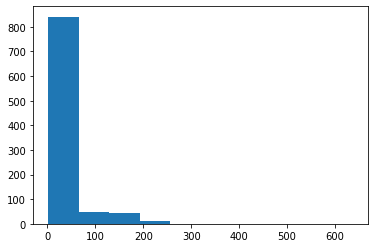

In [6]:
plt.hist(df.price_cad)

In [14]:
under100cad = df[df.price_cad < 100] 

In [16]:
under100cad.describe()

,price_cad,sales,num_reviews
count,873.000000,873.000000,873.000000
mean,22.275132,1709.640321,134.768614
std,17.206439,4030.289657,192.215825
min,1.740000,0.000000,0.000000
25%,11.130000,67.000000,8.000000
50%,16.990000,348.000000,46.000000
75%,26.290000,1274.000000,166.000000
max,98.760000,37141.000000,969.000000


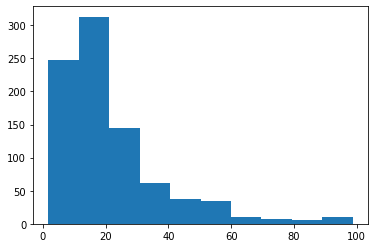

In [15]:
plt.hist(under100cad.price_cad);

In [186]:
df.head()

,header,price_cad,sales,seller,details,description,availability,num_reviews,des_length
0,ZERO | paracord men/women fashion bracelet,8.18,121.0,blacksquirrel2019,"['Handmade item', 'Materials: Nylon', 'Adjusta...",ZERO by BlackSquirrel is an ultra-minimal brac...,In stock,26,192
1,Black Paracord Survival Bracelet w/ Fishing Li...,19.99,169.0,SterlingSurvival,"['Handmade item', 'Materials: Plastic', 'Adjus...",**COVID-19 ANNOUNCEMENT: The current global pa...,In stock,20,113
2,Wide-cuffed Paracord Bracelet!,30.00,1.0,GorillaCordzCanada,"['Handmade item', 'Materials: Paracord', 'Adju...","Durable and rugged enough for the outdoors, st...",In stock,No review,88
3,Stylish Paracord Bracelet,8.75,29.0,BraceletsandbeyondCa,"['Handmade item', 'Materials: Nylon', 'Adjusta...","Stylish Paracord BraceletHandmade""A Must Have""...",In stock,10,10
4,Paracord 7” Bracelets,6.50,179.0,BrigsSandP,"['Handmade item', 'Materials: Paracord', 'Adju...","Video Game, Character & Dragon Paracord Bracel...",In stock,34,61


In [189]:
#top 50 products
top50 = df.sort_values(['sales','num_reviews','price_cad'],ascending=False)[:50]

In [192]:
top50.price_cad.describe()

count     50.000000
mean      30.606200
std       26.238204
min        4.120000
25%       20.870000
50%       21.550000
75%       34.070000
max      132.700000
Name: price_cad, dtype: float64

#### explore sellers with top sales

In [11]:
df.sort_values(['sales'],ascending=False)

,header,price_cad,sales,seller,details,description,availability,num_reviews
569,Sports Paracord Bracelet - Baseball Bracelet -...,18.96,37141.0,SweetAspenJewels,No info,Show off your sport with this stylish and easy...,In stock,6
442,Sports Paracord Bracelet - Soccer Bracelet - Y...,18.92,37141.0,SweetAspenJewels,No info,Show off your sport with this stylish and easy...,In stock,6
270,Sports Paracord Bracelet - Basketball Bracelet...,16.69,37141.0,SweetAspenJewels,No info,Adjustable Paracord is wrapped and tied on to ...,In stock,6
200,"Turner, Simple Anklet, Gray Paracord Bracelet,...",12.45,30889.0,Fanfarria,No info,This lovely boho bracelet/ anklet was made usi...,In stock,4
214,"Turner, Simple Anklet, Natural Paracord Bracel...",12.50,30889.0,Fanfarria,No info,This lovely boho bracelet/ anklet was made usi...,In stock,4
198,Couple Bracelets • Couple Gift for Boyfriend •...,20.87,27052.0,MakeaWishXO,['Handmade item\n\nBracelet length: 7.5 Inches...,Couple Bracelets • Couple Gift for Boyfriend •...,In stock,3
482,Engraved Bracelet for Him Personalized Bracele...,20.87,27052.0,MakeaWishXO,['Handmade item\n\nBracelet length: 7.5 Inches...,Engraved Bracelet for Him • Personalized Brace...,In stock,3
622,Best Friend Gifts • Paracord Bracelet Gifts • ...,20.87,27052.0,MakeaWishXO,['Handmade item\n\nBracelet length: 7.5 Inches...,Best Friend Gifts • Paracord Bracelet Gifts • ...,In stock,3
418,Engraved Bracelet for Him Personalized Bracele...,20.87,27052.0,MakeaWishXO,['Handmade item\n\nBracelet length: 7.5 Inches...,Engraved Bracelet for Him • Personalized Brace...,In stock,3
272,Adult Essential Oil Lava Bracelet / Women Para...,20.99,17825.0,LateNightLuna,"['Handmade item', 'Materials: nylon paracord, ...",Beautiful top quality paracord bracelet with t...,In stock,2


In [12]:
df.description[165]

'Made out of 100% authentic parachute cord, this bracelet is suitable for almost anyone due to the sliding knots making it very adjustable. Color shown is a light pink. ******************************Shipping information : All items are sent from Ontario, Canada through Canada Post in a 6X9 bubble mailer. Expected delivery once items have been marked as shipped :CANADA : 3-5 business daysUSA : 1-3 weeks. EVERYWHERE ELSE : 1-3 weeksDisclaimer : 1) NO TRACKING NUMBERS WILL BE PROVIDED (This is to ensure my customers pay the lowest possible price for shipping). Please note that some delays may happen during holiday seasons and customs. Seller is not responsible for delays.'

#### made to order

In [11]:
df.loc[df.details.str.contains('Made to Order') == True,'made_to_order'] = 'Yes'
df.loc[df.details.str.contains('Made to Order') == False,'made_to_order'] = 'No'

#### personalized

In [13]:
df.loc[df.details.str.contains('Can be personalised: Yes') == True,'personalised'] = 'Yes'
df.loc[df.details.str.contains('Can be personalised: No') == True,'personalised'] = 'No'
df.loc[~df.details.str.contains('Can be personalised') == True,'personalised'] = 'No info'

#### material

In [112]:
df['material'] = pd.Series(df.details.str.extract('(Materials: .+?\')').values.flatten()).str.replace('\'','').str.replace('Materials: ','')

In [118]:
df.material = df.material.str.lower()

In [113]:
df['material'][df['material'].apply(lambda x: isinstance(x, float))] = 'No info' 

#### adjustable

In [28]:
df.loc[df.details.str.contains('Adjustable: Yes') == True,'adjustable'] = 'Yes'
df.loc[df.details.str.contains('Adjustable: No') == True,'adjustable'] = 'No'
df.loc[~df.details.str.contains('Adjustable') == True,'adjustable'] = 'No info'

#### bracelet width

In [50]:
df['bracelet_width'] = pd.Series(df.details.str.extract('(Bracelet width: \d*.?\d+ \w+)').values.flatten()).str.extract('(\d*.?\d+ \w+)')

In [58]:
df['bracelet_width'][df['bracelet_width'].apply(lambda x: isinstance(x, float))] = 'No info' 

#### bracelet length

In [132]:
df['bracelet_length'] = pd.Series(df.details.str.extract('(Bracelet length: \d*.?\d+ \w+)').values.flatten()).str.replace('Bracelet length: ','')

In [133]:
df['bracelet_length'][df['bracelet_length'].apply(lambda x: isinstance(x, float))] = 'No info' 

### 3. Description Analysis

#### Description Length

In [111]:
df['des_length'] = df.description.apply(lambda x: len(str(x).split()))

In [112]:
df.des_length.describe()

count     944.000000
mean      148.947034
std       158.474205
min         3.000000
25%        52.000000
50%        97.000000
75%       190.000000
max      1007.000000
Name: description, dtype: float64

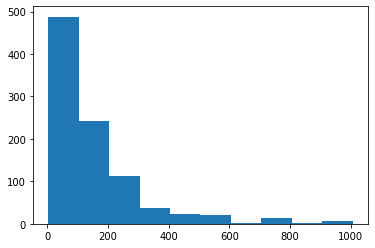

In [106]:
plt.hist(wordcount);

In [129]:
#description length of top 50 products
top50 = df.sort_values(['sales','num_reviews','des_length'],ascending=False)['des_length'][:50]

In [131]:
top50.describe()

count      50.000000
mean      498.080000
std       324.200042
min         8.000000
25%       261.250000
50%       456.000000
75%       795.000000
max      1007.000000
Name: des_length, dtype: float64

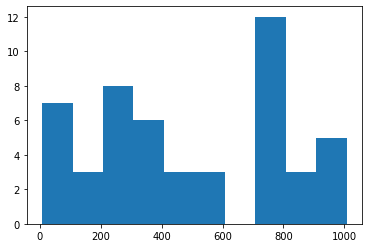

In [130]:
plt.hist(top50);

#### Preprocessing

In [45]:
#remove punctuation
import string 
def remove_punc(text):
    no_punct = "".join([i for i in text if (i not in string.punctuation)])
    return no_punct

In [46]:
no_punct = df.description.str.lower().apply(remove_punc).str.strip()

In [47]:
no_punct

0      zero by blacksquirrel is an ultraminimal brace...
1      covid19 announcement the current global pandem...
2      durable and rugged enough for the outdoors sty...
3      stylish paracord bracelethandmadea must havepl...
4      video game character  dragon paracord bracelet...
5      handmade bracelets made with lovei always had ...
6      this bracelet is the cobra weave design’ and f...
7      this personalized bracelet will be a great gif...
8      colourful hard wearing  coolthese vibrant full...
9      valknut  paracord bracelet with exclusive amul...
10     made out of 100 authentic parachute cord this ...
11     i will start making bracelets with different s...
12     made out of 100 authentic parachute cord this ...
13     the bracelet is made of 550 type paracord blac...
14     this bracelet is the conquistador weave design...
15     large selection of paracord bracelets and keyc...
16     men black paracord  nautical wanderlust bracel...
17     high value the bracelet 

In [40]:
#lemmatization
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
from nltk.corpus import wordnet as wn
from nltk.tag import pos_tag

lemmatizer = WordNetLemmatizer()
tag_map = defaultdict(lambda: wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

In [63]:
def lemma_text(text):
    lemma = []
    for token, tag in pos_tag(text.split()):
        lemma1 = lemmatizer.lemmatize(token,tag_map[tag[0]])
        lemma.append(lemma1)
    return lemma

In [64]:
lemma = no_punct.apply(lemma_text)

In [65]:
lemma[0:5]

0    [zero, by, blacksquirrel, be, an, ultraminimal...
1    [covid19, announcement, the, current, global, ...
2    [durable, and, rugged, enough, for, the, outdo...
3    [stylish, paracord, bracelethandmadea, must, h...
4    [video, game, character, dragon, paracord, bra...
Name: description, dtype: object

In [66]:
# remove non-words
words = set(nltk.corpus.words.words())

def remove_non_words(text):
    print(text)
    return [' '.join(w for w in text if w in words)]

In [67]:
no_non_words = lemma.apply(remove_non_words)

['zero', 'by', 'blacksquirrel', 'be', 'an', 'ultraminimal', 'bracelet', 'to', 'be', 'use', 'in', 'your', 'everyday', 'although', 'it', 'be', 'make', 'in', 'different', 'size', 'thanks', 'to', 'a', 'particular', 'sliding', 'knot', 'you', 'can', 'tighten', 'it', 'or', 'enlarge', 'it', 'a', 'you', 'wish', 'so', 'you', 'can', 'find', 'the', 'perfect', 'fitbeing', 'adjustable', 'it', 'be', 'an', 'excellent', 'gift', 'idea', 'when', 'you', 'do', 'not', 'know', 'the', 'wrist', 'size', 'of', 'the', 'person', 'to', 'whom', 'the', 'bracelet', 'will', 'go', 'the', 'bracelet', 'be', 'handmade', 'in', 'our', 'artisan', 'workshop', 'in', 'italy', 'the', 'bracelet', 'be', 'in', 'paracord', '550', 'with', 'over', '50', 'color', 'availablechoose', 'the', 'right', 'gift', 'blacksquirrel', 'clip', 'your', 'freedomall', 'blacksquirrel', 'accessory', 'be', 'make', 'in', 'italy', 'by', 'hand', 'and', 'on', 'commission', 'once', 'we', 'receive', 'your', 'order', 'we', 'will', 'make', 'a', 'taylor', 'make', '

In [69]:
no_non_words

0      [zero by be an bracelet to be use in your ever...
1      [announcement the current global pandemic may ...
2      [durable and rugged enough for the outdoors st...
3             [stylish must message me for any question]
4      [video game character dragon all the out there...
5      [handmade bracelet make with always have a pas...
6      [this bracelet be the cobra weave and feature ...
7      [this bracelet will be a great gift for the ma...
8      [hard wear vibrant fully adjustable double wra...
9      [bracelet with exclusive amulet with runic cir...
10     [make out of authentic parachute cord this bra...
11     [i will start make bracelet with different str...
12     [make out of authentic parachute cord this bra...
13     [the bracelet be make of type black and colour...
14     [this bracelet be the conquistador weave desig...
15     [large selection of bracelet and i can take re...
16     [men black nautical wanderlust bracelet of cou...
17     [high value the bracelet

In [79]:
no_non_words[0][0]

'zero by be an bracelet to be use in your everyday although it be make in different size thanks to a particular sliding knot you can tighten it or enlarge it a you wish so you can find the perfect adjustable it be an excellent gift idea when you do not know the wrist size of the person to whom the bracelet will go the bracelet be handmade in our artisan workshop in the bracelet be in with over color the right gift clip your accessory be make in by hand and on commission once we receive your order we will make a make unique product with the color and size of your the circumference in the wide part of your wrist where the bone protrude use a sewing tape measure and wrap it around your wrist not too tight not too not use other method and do not measure other bracelet of ship for any question do not hesitate to contact our store you will find many other'

In [81]:
# remove stopwords
from nltk.corpus import stopwords
def remove_stopwords(text):
    return [w for w in text[0].split() if w not in stopwords.words('english')]

In [82]:
no_sw = no_non_words.apply(remove_stopwords)

In [85]:
no_sw[:5]

0    [zero, bracelet, use, everyday, although, make...
1    [announcement, current, global, pandemic, may,...
2    [durable, rugged, enough, outdoors, stylish, e...
3                   [stylish, must, message, question]
4    [video, game, character, dragon, make, custom,...
Name: description, dtype: object

#### Identify common topics using LDA

In [89]:
#LDA with Gensim
#https://towardsdatascience.com/topic-modelling-in-python-with-nltk-and-gensim-4ef03213cd21
from gensim import corpora
dictionary = corpora.Dictionary(no_sw)
corpus = [dictionary.doc2bow(text) for text in no_sw]

import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [91]:
import gensim
NUM_TOPICS = 10
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.029*"please" + 0.022*"bracelet" + 0.016*"image" + 0.015*"order"')
(1, '0.063*"bracelet" + 0.029*"make" + 0.021*"color" + 0.014*"size"')
(2, '0.054*"size" + 0.049*"wrist" + 0.046*"bracelet" + 0.027*"please"')
(3, '0.043*"wrist" + 0.038*"measure" + 0.032*"make" + 0.032*"bracelet"')
(4, '0.034*"wrist" + 0.033*"bracelet" + 0.029*"measure" + 0.027*"make"')
(5, '0.056*"bracelet" + 0.024*"wrist" + 0.019*"colour" + 0.019*"paper"')
(6, '0.027*"bracelet" + 0.023*"contact" + 0.019*"make" + 0.018*"order"')
(7, '0.030*"bracelet" + 0.026*"em" + 0.026*"line" + 0.023*"thin"')
(8, '0.058*"bracelet" + 0.041*"color" + 0.039*"size" + 0.020*"order"')
(9, '0.048*"bracelet" + 0.027*"wrist" + 0.024*"make" + 0.020*"size"')


#### Most common words

In [176]:
allwords = ' '.join(no_sw.apply(lambda x: ' '.join(x)))
freq = pd.Series(allwords.split()).value_counts()[:20]
freq

bracelet       2967
wrist          1616
make           1518
size           1357
please         1101
color           919
measure         876
use             846
order           755
measurement     594
inch            522
fit             500
add             427
cord            426
choose          375
length          375
string          363
would           363
item            361
tape            343
dtype: int64

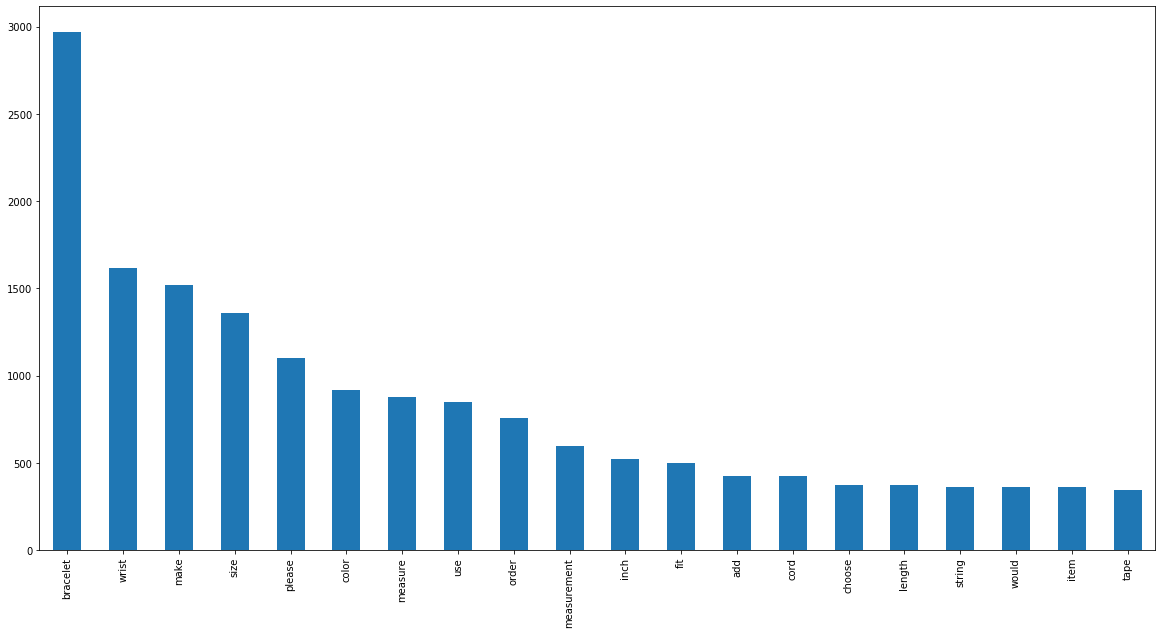

In [185]:
plt.figure(figsize=(20,10))
freq.plot.bar()

#### 2. header

In [87]:
#wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [96]:
df.header.str.lower()

0             zero | paracord men/women fashion bracelet
1      black paracord survival bracelet w/ fishing li...
2                         wide-cuffed paracord bracelet!
3                              stylish paracord bracelet
4                                  paracord 7” bracelets
5                           paracord bracelets hand made
6      mad max inspired adjustable paracord survival ...
7      mens paracord bracelet! paracord bracelet mens...
8      adjustable paracord bracelet, rope bracelet, p...
9      valknut - paracord bracelet with exclusive amu...
10     paracord bracelet, black bracelet, men and wom...
11                                     paracord bracelet
12     paracord bracelet, white bracelet, men and wom...
13     paracord bracelet with predator brass shackle,...
14     conquistador paracord survival bracelet handma...
15     paracord bracelets, paracord keychains, adult ...
16     paracord nautical bracelet, black bracelet, br...
17     cordbraid viking paracor

In [93]:
header1 = df.header.str.lower().apply(lambda x: x + ' ')

In [97]:
header1 = ''.join(list(flatten(header1)))

In [99]:
header1

'zero | paracord men/women fashion bracelet black paracord survival bracelet w/ fishing line & tinder built in,buckle includes whistle, fire rod and striker, and compass wide-cuffed paracord bracelet! stylish paracord bracelet paracord 7” bracelets paracord bracelets hand made mad max inspired adjustable paracord survival bracelet - various colours uk mens paracord bracelet! paracord bracelet mens. personalized surfer paracord bracelet. adjustable paracord bracelet, rope bracelet, paracord gift. adjustable multi-coloured paracord bracelet valknut - paracord bracelet with exclusive amulet - valknut with runic circle (futhark) paracord bracelet, black bracelet, men and women bracelet, survival bracelet paracord bracelet paracord bracelet, white bracelet, men and women bracelet, survival bracelet paracord bracelet with predator brass shackle, valkyrie bead, viking jewelry, gift for him, mens bangle, armband, viking jewelry conquistador paracord survival bracelet handmade in the uk paracor

In [44]:
# remove punctuation
header2 = remove_punc(header1)

In [45]:
header2

'zero   menwomen fashion  black  survival  w fishing line  tinder built inbuckle includes whistle fire rod and striker and compass widecuffed   stylish    7” s  s hand made mad max inspired adjustable  survival   various colours uk mens     mens personalized surfer   adjustable   rope   gift adjustable multicoloured   valknut    with exclusive amulet  valknut with runic circle futhark   black  men and women  survival      white  men and women  survival    with predator brass shackle valkyrie bead viking jewelry gift for him mens bangle armband viking jewelry conquistador  survival  handmade in the uk  s  keychains adult  s camping s  nautical  black   with stainless steel men jewelry gift idea wanderlust  round cord  cordbraid viking   of the class  thor hammer  sanctified   mad max   adjustable sanctified     simple adjustable 550  friendship   anklet handmade in the uk   red  men and women  survival  great dragon  two color   with exclusive bronze buckle handmade   color black and gr

In [46]:
#split long words
def split_long_word(text):
    split = [['paracord'] if i == 'paracord' else wordninja.split(i) for i in text.split()]
    return list(flatten(split))

In [50]:
header3 = ' '.join(wordninja.split(header2))

In [52]:
header3

'zero men women fashion black survival w fishing line tinder built in buckle includes whistle fire rod and striker and compass wide cuffed stylish 7 s s hand made mad max inspired adjustable survival various colours uk mens mens personalized surfer adjustable rope gift adjustable multi coloured val knut with exclusive amulet val knut with runic circle fu th ark black men and women survival white men and women survival with predator brass shackle valkyrie bead viking jewelry gift for him mens bangle armband viking jewelry conquistador survival handmade in the uk s keychains adult s camping s nautical black with stainless steel men jewelry gift idea wanderlust round cord cord braid viking of the class thor hammer sanctified mad max adjustable sanctified simple adjustable 550 friendship anklet handmade in the uk red men and women survival great dragon two color with exclusive bronze buckle handmade color black and graphite rasta ra safari cord men men gift women round cord rasta jewelry c

In [55]:
#lemmatization
import nltk
from nltk.stem.wordnet import WordNetLemmatizer

header4 = []
for i in header3.split():
    header4.append(WordNetLemmatizer().lemmatize(i))
header4 = ' '.join(header4)

In [56]:
header4

'zero men woman fashion black survival w fishing line tinder built in buckle includes whistle fire rod and striker and compass wide cuffed stylish 7 s s hand made mad max inspired adjustable survival various colour uk men men personalized surfer adjustable rope gift adjustable multi coloured val knut with exclusive amulet val knut with runic circle fu th ark black men and woman survival white men and woman survival with predator brass shackle valkyrie bead viking jewelry gift for him men bangle armband viking jewelry conquistador survival handmade in the uk s keychains adult s camping s nautical black with stainless steel men jewelry gift idea wanderlust round cord cord braid viking of the class thor hammer sanctified mad max adjustable sanctified simple adjustable 550 friendship anklet handmade in the uk red men and woman survival great dragon two color with exclusive bronze buckle handmade color black and graphite rasta ra safari cord men men gift woman round cord rasta jewelry camou

In [57]:
#wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(width = 800, height = 400, background_color="white",max_words= 50).generate(header4)

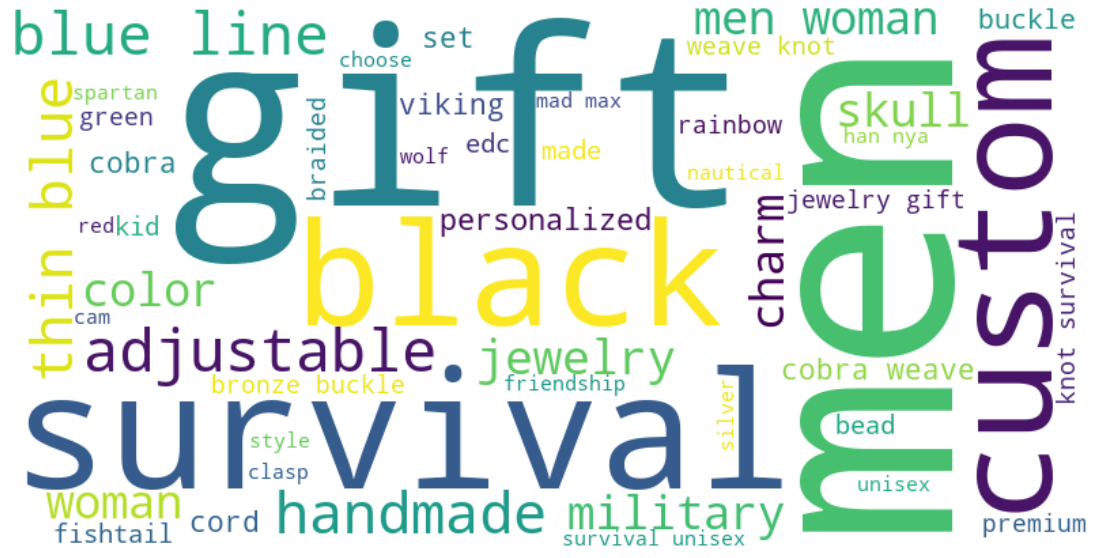

In [60]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloudcleaned.png', facecolor='k', bbox_inches='tight')
plt.show()

In [59]:
plt.savefig('wordcloudcleaned.png', facecolor='k', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

#### 3. header no 'paracord bracelet'

In [4]:
#wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [5]:
df.header.str.lower()

0             zero | paracord men/women fashion bracelet
1      black paracord survival bracelet w/ fishing li...
2                         wide-cuffed paracord bracelet!
3                              stylish paracord bracelet
4                                  paracord 7” bracelets
5                           paracord bracelets hand made
6      mad max inspired adjustable paracord survival ...
7      mens paracord bracelet! paracord bracelet mens...
8      adjustable paracord bracelet, rope bracelet, p...
9      valknut - paracord bracelet with exclusive amu...
10     paracord bracelet, black bracelet, men and wom...
11                                     paracord bracelet
12     paracord bracelet, white bracelet, men and wom...
13     paracord bracelet with predator brass shackle,...
14     conquistador paracord survival bracelet handma...
15     paracord bracelets, paracord keychains, adult ...
16     paracord nautical bracelet, black bracelet, br...
17     cordbraid viking paracor

In [16]:
header1 = df.header.str.lower().apply(lambda x: x + ' ')

In [40]:
header1 = ''.join(list(flatten(header1))).replace('paracord','').replace('bracelet','')

In [41]:
header1

'zero |  men/women fashion  black  survival  w/ fishing line & tinder built in,buckle includes whistle, fire rod and striker, and compass wide-cuffed  ! stylish    7” s  s hand made mad max inspired adjustable  survival  - various colours uk mens  !   mens. personalized surfer  . adjustable  , rope ,  gift. adjustable multi-coloured   valknut -   with exclusive amulet - valknut with runic circle (futhark)  , black , men and women , survival     , white , men and women , survival    with predator brass shackle, valkyrie bead, viking jewelry, gift for him, mens bangle, armband, viking jewelry conquistador  survival  handmade in the uk  s,  keychains, adult  s, camping s  nautical , black ,  with stainless steel, men jewelry gift idea, wanderlust , round cord  cordbraid viking   of the class - thor hammer  sanctified  , mad max  , adjustable sanctified     simple adjustable 550  friendship  / anklet handmade in the uk  , red , men and women , survival  great dragon - two color   with excl

In [42]:
# remove punctuation
header2 = remove_punc(header1)

NameError: name 'remove_punc' is not defined

In [101]:
header2

'zero  paracord menwomen fashion bracelet black paracord survival bracelet w fishing line  tinder built inbuckle includes whistle fire rod and striker and compass widecuffed paracord bracelet stylish paracord bracelet paracord 7” bracelets paracord bracelets hand made mad max inspired adjustable paracord survival bracelet  various colours uk mens paracord bracelet paracord bracelet mens personalized surfer paracord bracelet adjustable paracord bracelet rope bracelet paracord gift adjustable multicoloured paracord bracelet valknut  paracord bracelet with exclusive amulet  valknut with runic circle futhark paracord bracelet black bracelet men and women bracelet survival bracelet paracord bracelet paracord bracelet white bracelet men and women bracelet survival bracelet paracord bracelet with predator brass shackle valkyrie bead viking jewelry gift for him mens bangle armband viking jewelry conquistador paracord survival bracelet handmade in the uk paracord bracelets paracord keychains ad

In [103]:
#split long words
def split_long_word(text):
    split = [['paracord'] if i == 'paracord' else wordninja.split(i) for i in text.split()]
    return list(flatten(split))

In [107]:
header3 = ' '.join(split_long_word(header2))

In [108]:
header3

'zero paracord men women fashion bracelet black paracord survival bracelet w fishing line tinder built in buckle includes whistle fire rod and striker and compass wide cuffed paracord bracelet stylish paracord bracelet paracord 7 bracelets paracord bracelets hand made mad max inspired adjustable paracord survival bracelet various colours uk mens paracord bracelet paracord bracelet mens personalized surfer paracord bracelet adjustable paracord bracelet rope bracelet paracord gift adjustable multi coloured paracord bracelet val knut paracord bracelet with exclusive amulet val knut with runic circle fu th ark paracord bracelet black bracelet men and women bracelet survival bracelet paracord bracelet paracord bracelet white bracelet men and women bracelet survival bracelet paracord bracelet with predator brass shackle valkyrie bead viking jewelry gift for him mens bangle armband viking jewelry conquistador paracord survival bracelet handmade in the uk paracord bracelets paracord keychains 

In [110]:
#lemmatization
import nltk
from nltk.stem.wordnet import WordNetLemmatizer

header4 = []
for i in header3.split():
    header4.append(WordNetLemmatizer().lemmatize(i))
header4 = ' '.join(header4)

In [119]:
header4

'zero paracord men woman fashion bracelet black paracord survival bracelet w fishing line tinder built in buckle includes whistle fire rod and striker and compass wide cuffed paracord bracelet stylish paracord bracelet paracord 7 bracelet paracord bracelet hand made mad max inspired adjustable paracord survival bracelet various colour uk men paracord bracelet paracord bracelet men personalized surfer paracord bracelet adjustable paracord bracelet rope bracelet paracord gift adjustable multi coloured paracord bracelet val knut paracord bracelet with exclusive amulet val knut with runic circle fu th ark paracord bracelet black bracelet men and woman bracelet survival bracelet paracord bracelet paracord bracelet white bracelet men and woman bracelet survival bracelet paracord bracelet with predator brass shackle valkyrie bead viking jewelry gift for him men bangle armband viking jewelry conquistador paracord survival bracelet handmade in the uk paracord bracelet paracord keychains adult p

In [139]:
#wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(width = 800, height = 400, background_color="white",max_words= 50).generate(header4)

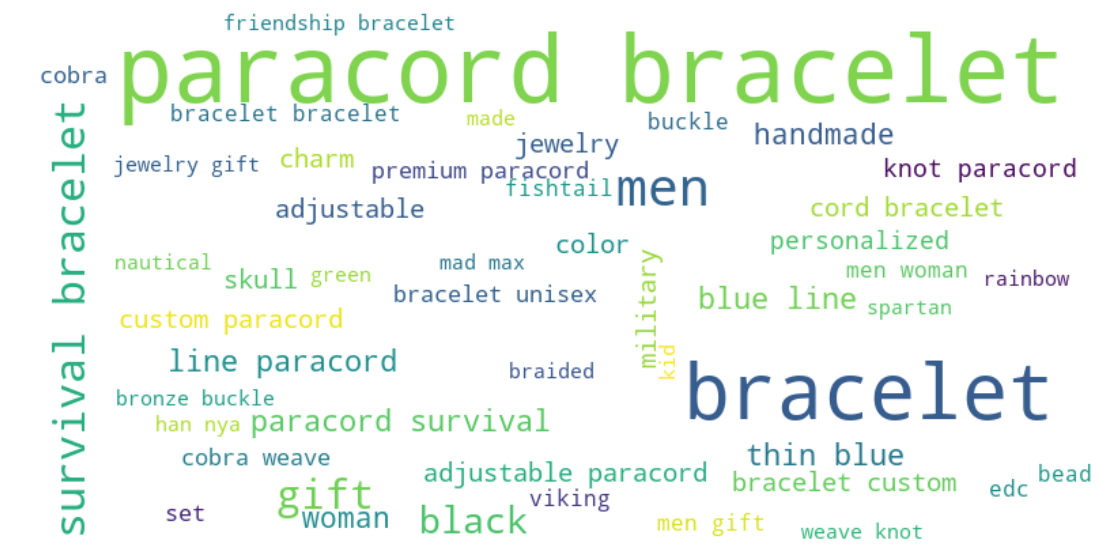

In [140]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [141]:
plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

### Description

In [7]:
df.head()

,header,price_cad,sales,seller,details,description,availability,num_reviews
0,ZERO | paracord men/women fashion bracelet,8.18,121.0,blacksquirrel2019,"['Handmade item', 'Materials: Nylon', 'Adjusta...",ZERO by BlackSquirrel is an ultra-minimal brac...,In stock,26
1,Black Paracord Survival Bracelet w/ Fishing Li...,19.99,169.0,SterlingSurvival,"['Handmade item', 'Materials: Plastic', 'Adjus...",**COVID-19 ANNOUNCEMENT: The current global pa...,In stock,20
2,Wide-cuffed Paracord Bracelet!,30.00,1.0,GorillaCordzCanada,"['Handmade item', 'Materials: Paracord', 'Adju...","Durable and rugged enough for the outdoors, st...",In stock,No review
3,Stylish Paracord Bracelet,8.75,29.0,BraceletsandbeyondCa,"['Handmade item', 'Materials: Nylon', 'Adjusta...","Stylish Paracord BraceletHandmade""A Must Have""...",In stock,10
4,Paracord 7” Bracelets,6.50,179.0,BrigsSandP,"['Handmade item', 'Materials: Paracord', 'Adju...","Video Game, Character & Dragon Paracord Bracel...",In stock,34


In [9]:
df.description[2]

'Durable and rugged enough for the outdoors, stylish enough for the city! Include this bracelet with your EDC to add style and practicality! Our bracelets are custom handmade to order! Made with strong and durable 550 paracord! Item description:Width - 1.5 (1 1/2) inchesThickness - 0.25 (1/4) inchesLength - will vary depending on wrist size550 Paracord - 7 strand innerPlastic side release buckleItems process in 2-3 business days.Can be customized with 2 colours. IF SELECTING 2 COLOURS, PLEASE LET US KNOW!Colours may not look exactly as in pictures.'